In [2]:
from src.adapters.experiments import Experiments, Settings
from pymongo import MongoClient

mongo_client = MongoClient('mongodb://localhost:27017')
database = mongo_client['experiments']
directory = 'experiments'
settings = Settings(device='cpu', workers=0, database=database, directory=directory)
experiments = Experiments(settings)

In [3]:
for experiment in experiments.list():
    print(" - ", experiment.name)


 -  001-mnist-bz=256-mlp-256-0.0-relu
 -  001-mnist-bz=256-mlp-256-0.2-relu
 -  001-mnist-bz=256-mlp-256-0.5-relu
 -  001-mnist-bz=256-mlp-512-0.0-relu
 -  001-mnist-bz=256-mlp-512-0.2-relu
 -  001-mnist-bz=256-mlp-512-0.5-relu
 -  001-mnist-bz=256-glu-256-0.0-relu
 -  001-mnist-bz=256-glu-256-0.2-relu
 -  001-mnist-bz=256-glu-256-0.5-relu
 -  001-mnist-bz=256-glu-512-0.0-relu
 -  001-mnist-bz=256-glu-512-0.2-relu
 -  001-mnist-bz=256-glu-512-0.5-relu
 -  001-fashion-mnist-bz=256-mlp-256-0.0-relu
 -  001-fashion-mnist-bz=256-mlp-256-0.2-relu
 -  001-fashion-mnist-bz=256-mlp-256-0.5-relu
 -  001-fashion-mnist-bz=256-mlp-512-0.0-relu
 -  001-fashion-mnist-bz=256-mlp-512-0.2-relu
 -  001-fashion-mnist-bz=256-mlp-512-0.5-relu
 -  001-fashion-mnist-bz=256-glu-256-0.0-relu
 -  001-fashion-mnist-bz=256-glu-256-0.2-relu
 -  001-fashion-mnist-bz=256-glu-256-0.5-relu
 -  001-fashion-mnist-bz=256-glu-512-0.0-relu
 -  001-fashion-mnist-bz=256-glu-512-0.2-relu
 -  001-fashion-mnist-bz=256-glu-512-0

In [4]:
for experiment in experiments.list():
    print("----------------------------------------")
    print("Experiment Name: ")
    print(" - ", experiment.name)
    state = experiments.states.get(experiment)
    print("Experiment Description:")
    print(" - ","Neural network:", state.nn)
    print(" - ","Optimizer:", state.optimizer)
    print(" - ","Loss function:", state.criterion)
    print(" - ","Epochs:", state.epochs)
    print(" - ","Batch size:", state.batch_size)


----------------------------------------
Experiment Name: 
 -  001-mnist-bz=256-mlp-256-0.0-relu
Experiment Description:
 -  Neural network: classiffier-mlp-784-256-10-0.0-relu
 -  Optimizer: adam-0.001
 -  Loss function: cross-entropy
 -  Epochs: 100
 -  Batch size: 256
----------------------------------------
Experiment Name: 
 -  001-mnist-bz=256-mlp-256-0.2-relu
Experiment Description:
 -  Neural network: classiffier-mlp-784-256-10-0.2-relu
 -  Optimizer: adam-0.001
 -  Loss function: cross-entropy
 -  Epochs: 100
 -  Batch size: 256
----------------------------------------
Experiment Name: 
 -  001-mnist-bz=256-mlp-256-0.5-relu
Experiment Description:
 -  Neural network: classiffier-mlp-784-256-10-0.5-relu
 -  Optimizer: adam-0.001
 -  Loss function: cross-entropy
 -  Epochs: 100
 -  Batch size: 256
----------------------------------------
Experiment Name: 
 -  001-mnist-bz=256-mlp-512-0.0-relu
Experiment Description:
 -  Neural network: classiffier-mlp-784-512-10-0.0-relu
 -  Opt

In [5]:
from src.domain.models import Metric, Phase
from matplotlib.pyplot import figure, show
from matplotlib.pyplot import Axes

def plot(metric: Metric, ax: Axes, phase: Phase, linestyle: str, label: str):
    ax.set_title(metric.name)
    ax.plot(metric.history[phase], linestyle=linestyle, label=label)
    ax.legend()
    ax.grid()   
    ax.set_xlabel('epoch')

001-mnist-bz=256-mlp-256-0.0-relu 001-mnist-bz=256-glu-256-0.0-relu
001-mnist-bz=256-mlp-256-0.2-relu 001-mnist-bz=256-glu-256-0.2-relu
001-mnist-bz=256-mlp-256-0.5-relu 001-mnist-bz=256-glu-256-0.5-relu
001-mnist-bz=256-mlp-512-0.0-relu 001-mnist-bz=256-glu-512-0.0-relu
001-mnist-bz=256-mlp-512-0.2-relu 001-mnist-bz=256-glu-512-0.2-relu
001-mnist-bz=256-mlp-512-0.5-relu 001-mnist-bz=256-glu-512-0.5-relu


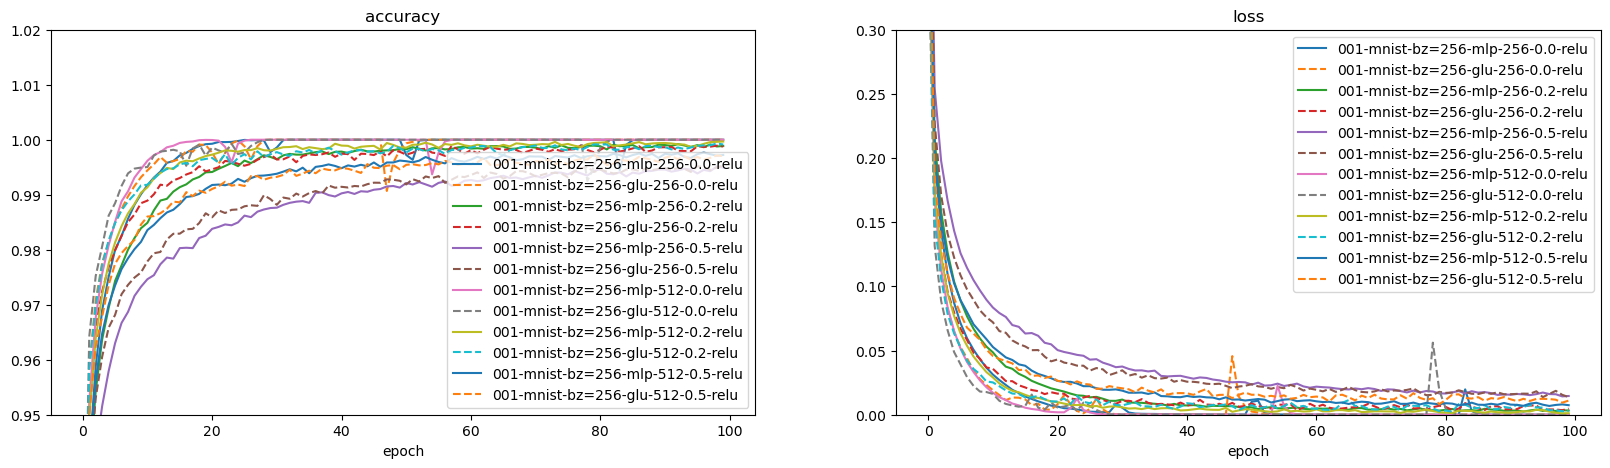

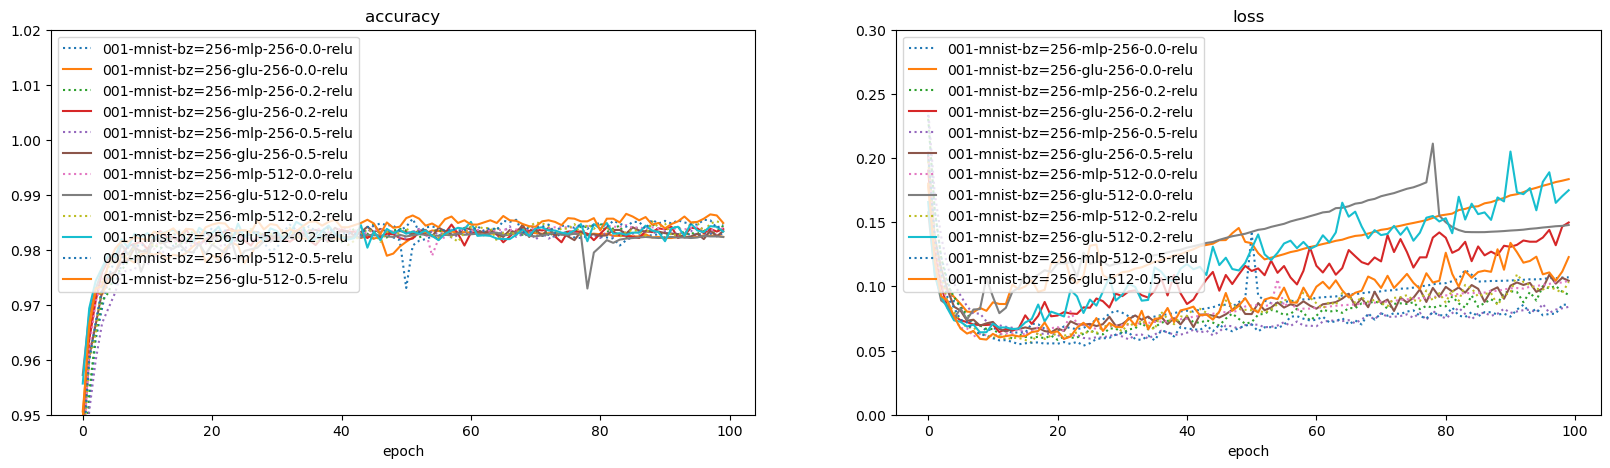

In [6]:
mnist_mlp = [
    "001-mnist-bz=256-mlp-256-0.0-relu",
    "001-mnist-bz=256-mlp-256-0.2-relu",
    "001-mnist-bz=256-mlp-256-0.5-relu",
    "001-mnist-bz=256-mlp-512-0.0-relu",
    "001-mnist-bz=256-mlp-512-0.2-relu",
    "001-mnist-bz=256-mlp-512-0.5-relu"
]

mnist_glu = [
    "001-mnist-bz=256-glu-256-0.0-relu",
    "001-mnist-bz=256-glu-256-0.2-relu",
    "001-mnist-bz=256-glu-256-0.5-relu",
    "001-mnist-bz=256-glu-512-0.0-relu",
    "001-mnist-bz=256-glu-512-0.2-relu",
    "001-mnist-bz=256-glu-512-0.5-relu"
]


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, glu in zip(mnist_mlp, mnist_glu):
    print(mlp, glu)
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.95, 1.02))
    ax[1].set_ylim((0, 0.3))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=glu)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, glu in zip(mnist_mlp, mnist_glu):
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.95, 1.02))
    ax[1].set_ylim((0, 0.3))

    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=glu)
show()

001-fashion-mnist-bz=256-mlp-256-0.0-relu 001-fashion-mnist-bz=256-glu-256-0.0-relu
001-fashion-mnist-bz=256-mlp-256-0.2-relu 001-fashion-mnist-bz=256-glu-256-0.2-relu
001-fashion-mnist-bz=256-mlp-256-0.5-relu 001-fashion-mnist-bz=256-glu-256-0.5-relu
001-fashion-mnist-bz=256-mlp-512-0.0-relu 001-fashion-mnist-bz=256-glu-512-0.0-relu
001-fashion-mnist-bz=256-mlp-512-0.2-relu 001-fashion-mnist-bz=256-glu-512-0.2-relu
001-fashion-mnist-bz=256-mlp-512-0.5-relu 001-fashion-mnist-bz=256-glu-512-0.5-relu


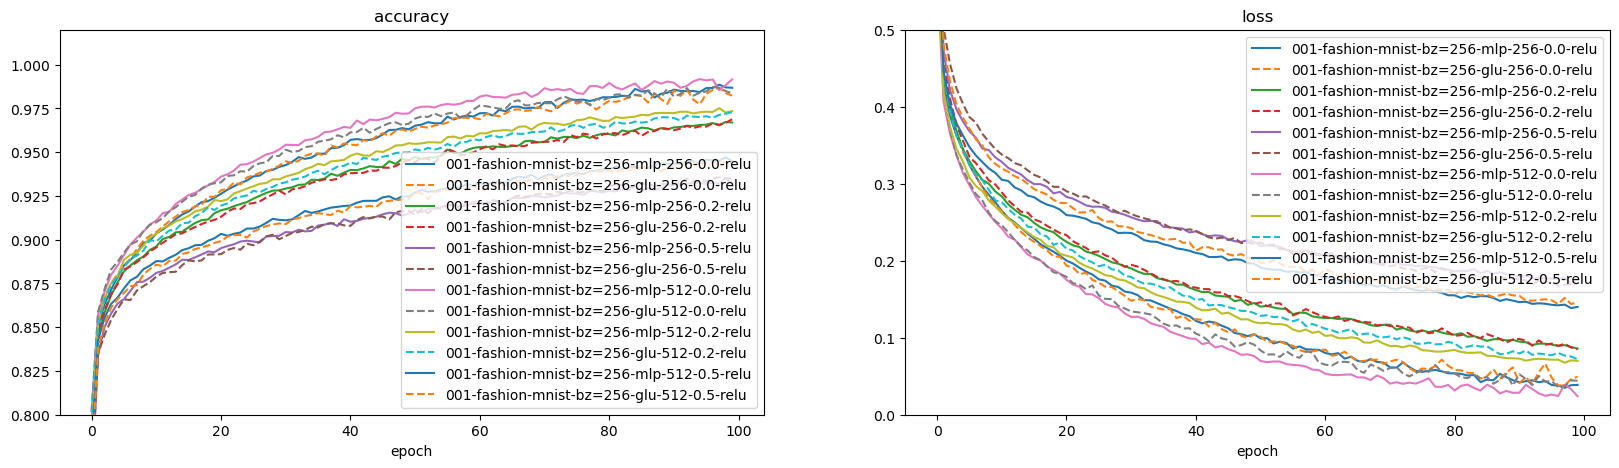

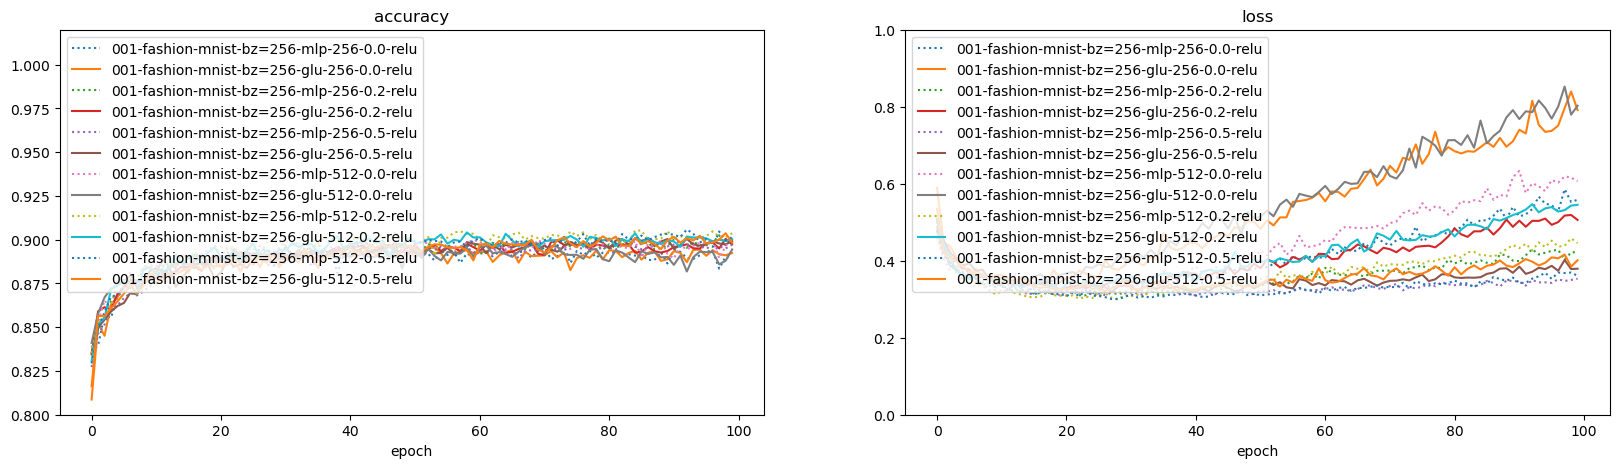

In [7]:
mnist_mlp = [
    "001-fashion-mnist-bz=256-mlp-256-0.0-relu",
    "001-fashion-mnist-bz=256-mlp-256-0.2-relu",
    "001-fashion-mnist-bz=256-mlp-256-0.5-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.0-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.2-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.5-relu"
]

mnist_glu = [
    "001-fashion-mnist-bz=256-glu-256-0.0-relu",
    "001-fashion-mnist-bz=256-glu-256-0.2-relu",
    "001-fashion-mnist-bz=256-glu-256-0.5-relu",
    "001-fashion-mnist-bz=256-glu-512-0.0-relu",
    "001-fashion-mnist-bz=256-glu-512-0.2-relu",
    "001-fashion-mnist-bz=256-glu-512-0.5-relu"
]

fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, glu in zip(mnist_mlp, mnist_glu):
    print(mlp, glu)
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 0.5))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=glu)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, glu in zip(mnist_mlp, mnist_glu):
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 1))

    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=glu)
show()

001-mnist-bz=256-mlp-256-0.0-relu 002-mnist-bz=256-glu-256-0.0-relu
001-mnist-bz=256-mlp-256-0.2-relu 002-mnist-bz=256-glu-256-0.2-relu
001-mnist-bz=256-mlp-256-0.5-relu 002-mnist-bz=256-glu-256-0.5-relu
001-mnist-bz=256-mlp-512-0.0-relu 002-mnist-bz=256-glu-512-0.0-relu
001-mnist-bz=256-mlp-512-0.2-relu 002-mnist-bz=256-glu-512-0.2-relu
001-mnist-bz=256-mlp-512-0.5-relu 002-mnist-bz=256-glu-512-0.5-relu


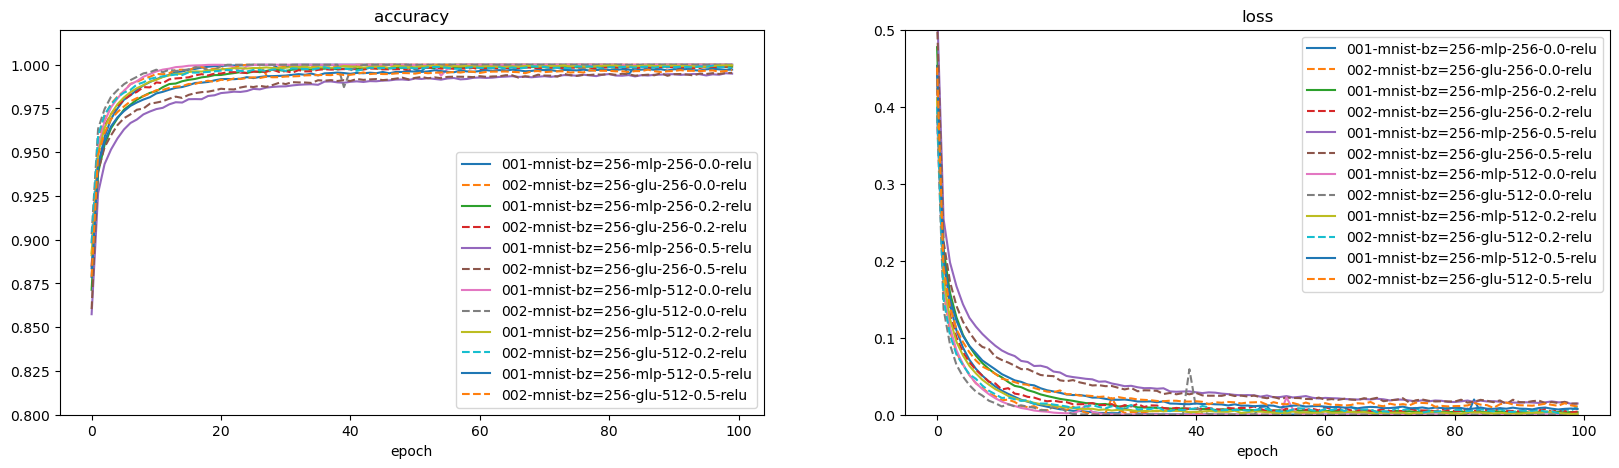

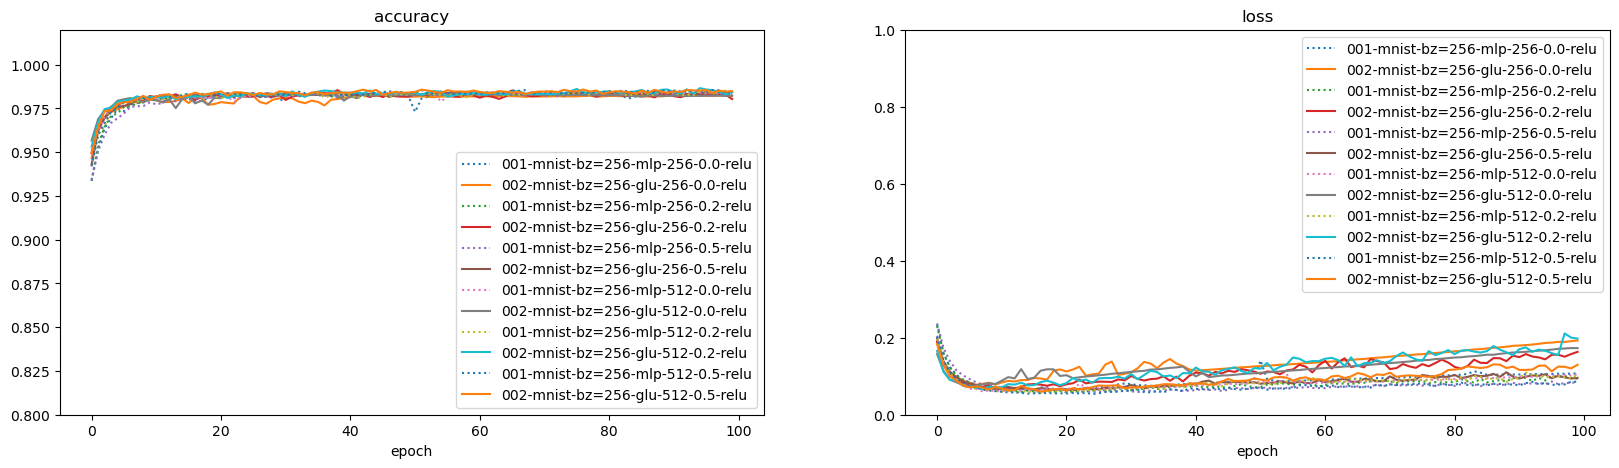

In [8]:
mnist_mlp = [
    "001-mnist-bz=256-mlp-256-0.0-relu",
    "001-mnist-bz=256-mlp-256-0.2-relu",
    "001-mnist-bz=256-mlp-256-0.5-relu",
    "001-mnist-bz=256-mlp-512-0.0-relu",
    "001-mnist-bz=256-mlp-512-0.2-relu",
    "001-mnist-bz=256-mlp-512-0.5-relu"
]

mnist_glu = [
    "002-mnist-bz=256-glu-256-0.0-relu",
    "002-mnist-bz=256-glu-256-0.2-relu",
    "002-mnist-bz=256-glu-256-0.5-relu",
    "002-mnist-bz=256-glu-512-0.0-relu",
    "002-mnist-bz=256-glu-512-0.2-relu",
    "002-mnist-bz=256-glu-512-0.5-relu"
]

fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, glu in zip(mnist_mlp, mnist_glu):
    print(mlp, glu)
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 0.5))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=glu)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, glu in zip(mnist_mlp, mnist_glu):
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 1))

    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=glu)
show()

001-fashion-mnist-bz=256-mlp-256-0.0-relu 002-fashion-mnist-bz=256-glu-256-0.0-relu
001-fashion-mnist-bz=256-mlp-256-0.2-relu 002-fashion-mnist-bz=256-glu-256-0.2-relu
001-fashion-mnist-bz=256-mlp-256-0.5-relu 002-fashion-mnist-bz=256-glu-256-0.5-relu
001-fashion-mnist-bz=256-mlp-512-0.0-relu 002-fashion-mnist-bz=256-glu-512-0.0-relu
001-fashion-mnist-bz=256-mlp-512-0.2-relu 002-fashion-mnist-bz=256-glu-512-0.2-relu
001-fashion-mnist-bz=256-mlp-512-0.5-relu 002-fashion-mnist-bz=256-glu-512-0.5-relu


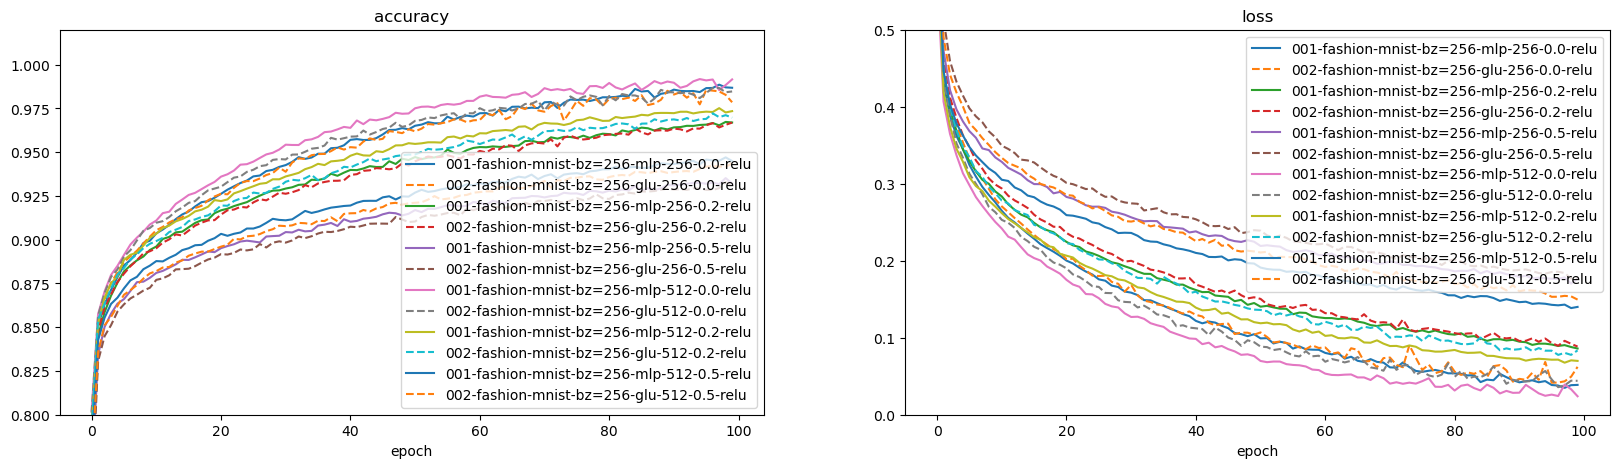

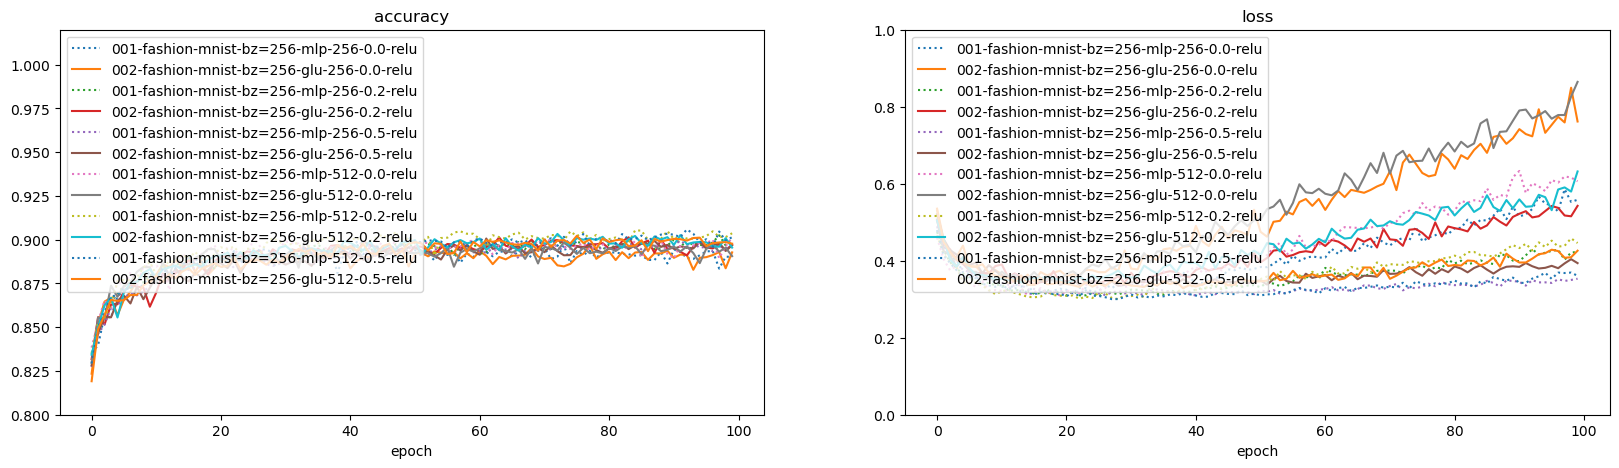

In [9]:
mnist_mlp = [
    "001-fashion-mnist-bz=256-mlp-256-0.0-relu",
    "001-fashion-mnist-bz=256-mlp-256-0.2-relu",
    "001-fashion-mnist-bz=256-mlp-256-0.5-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.0-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.2-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.5-relu"
]

mnist_glu = [
    "002-fashion-mnist-bz=256-glu-256-0.0-relu",
    "002-fashion-mnist-bz=256-glu-256-0.2-relu",
    "002-fashion-mnist-bz=256-glu-256-0.5-relu",
    "002-fashion-mnist-bz=256-glu-512-0.0-relu",
    "002-fashion-mnist-bz=256-glu-512-0.2-relu",
    "002-fashion-mnist-bz=256-glu-512-0.5-relu"
]

fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, glu in zip(mnist_mlp, mnist_glu):
    print(mlp, glu)
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 0.5))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=glu)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, glu in zip(mnist_mlp, mnist_glu):
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 1))

    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=glu)
show()

003-fashion-mnist-bz=256-mlp-256-0.0-silu 003-fashion-mnist-bz=256-glu-256-0.0-silu
003-fashion-mnist-bz=256-mlp-256-0.2-silu 003-fashion-mnist-bz=256-glu-256-0.2-silu
003-fashion-mnist-bz=256-mlp-256-0.5-silu 003-fashion-mnist-bz=256-glu-256-0.5-silu
003-fashion-mnist-bz=256-mlp-512-0.0-silu 003-fashion-mnist-bz=256-glu-512-0.0-silu
003-fashion-mnist-bz=256-mlp-512-0.2-silu 003-fashion-mnist-bz=256-glu-512-0.2-silu
003-fashion-mnist-bz=256-mlp-512-0.5-silu 003-fashion-mnist-bz=256-glu-512-0.5-silu


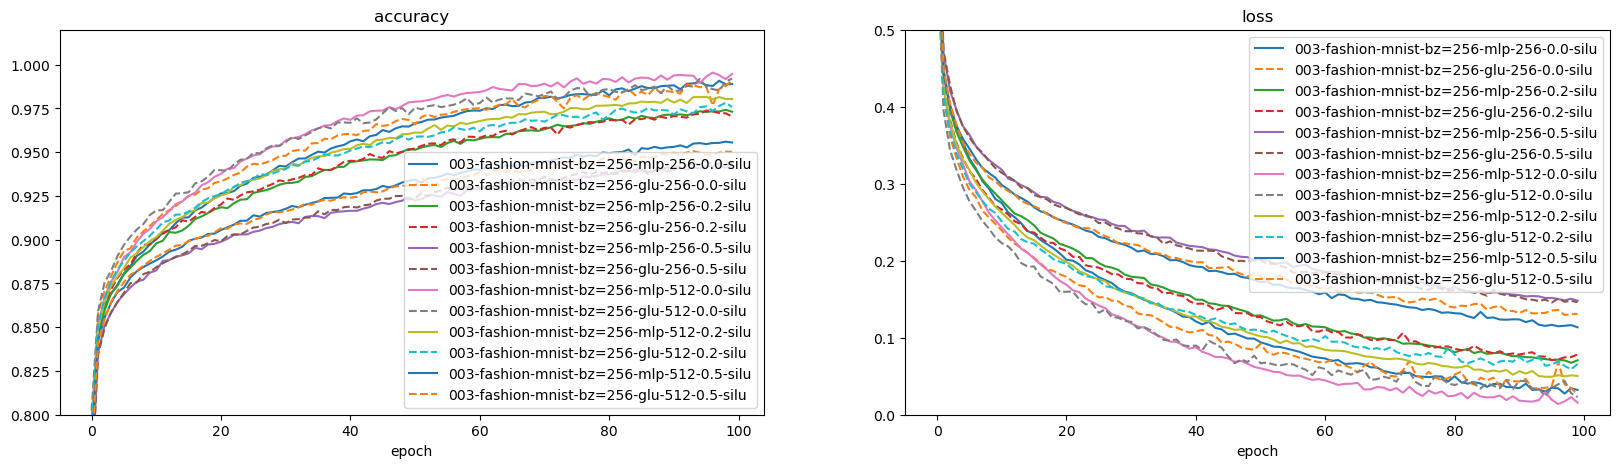

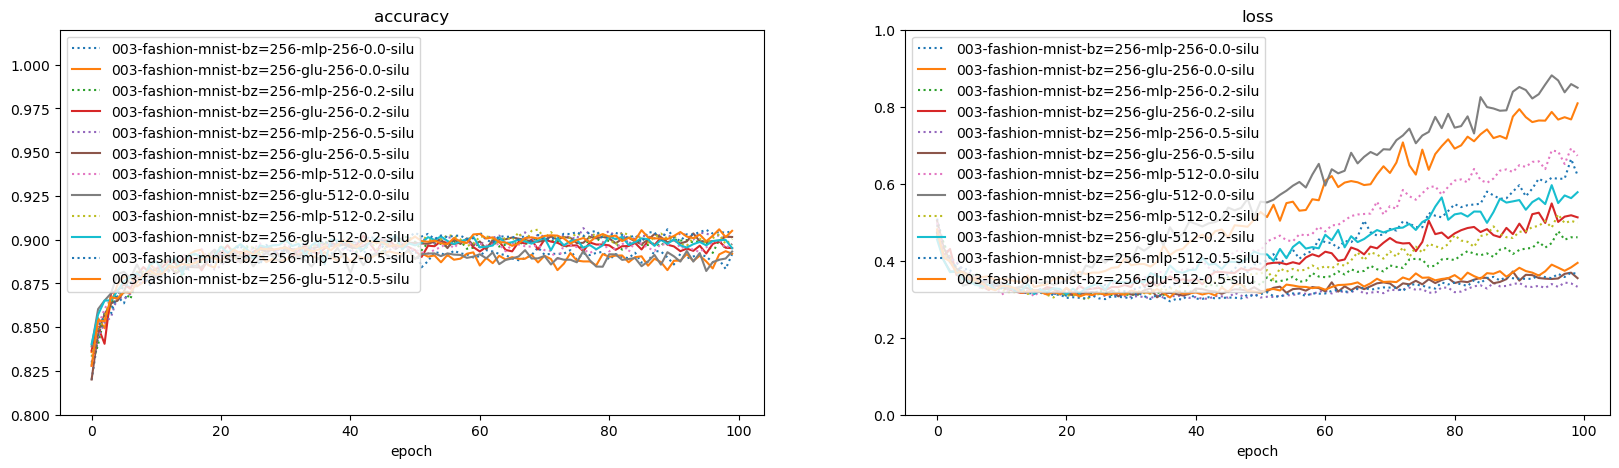

In [10]:
mnist_mlp = [
    "003-fashion-mnist-bz=256-mlp-256-0.0-silu",
    "003-fashion-mnist-bz=256-mlp-256-0.2-silu",
    "003-fashion-mnist-bz=256-mlp-256-0.5-silu",
    "003-fashion-mnist-bz=256-mlp-512-0.0-silu",
    "003-fashion-mnist-bz=256-mlp-512-0.2-silu",
    "003-fashion-mnist-bz=256-mlp-512-0.5-silu"
]

mnist_glu = [
    "003-fashion-mnist-bz=256-glu-256-0.0-silu",
    "003-fashion-mnist-bz=256-glu-256-0.2-silu",
    "003-fashion-mnist-bz=256-glu-256-0.5-silu",
    "003-fashion-mnist-bz=256-glu-512-0.0-silu",
    "003-fashion-mnist-bz=256-glu-512-0.2-silu",
    "003-fashion-mnist-bz=256-glu-512-0.5-silu"
]

fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, glu in zip(mnist_mlp, mnist_glu):
    print(mlp, glu)
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 0.5))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=glu)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, glu in zip(mnist_mlp, mnist_glu):
    mlp_experiment = experiments.get_by_name(mlp)
    glu_experiment = experiments.get_by_name(glu)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    glu_metrics = experiments.metrics.pull(glu_experiment)
    glu_state = experiments.states.get(glu_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 1))

    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(glu_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=glu)
show()

### Conclusión

Para tareas sencillas las $\text{GLU}$ no muestran mejoria alguna por sobre el perceptrón multicapa.

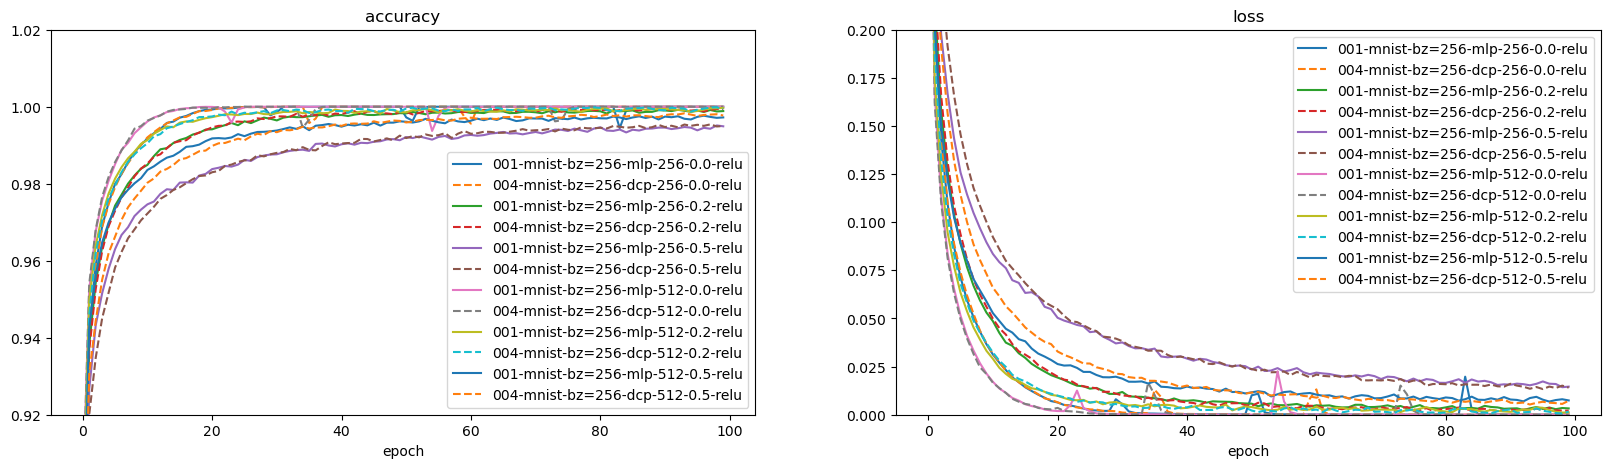

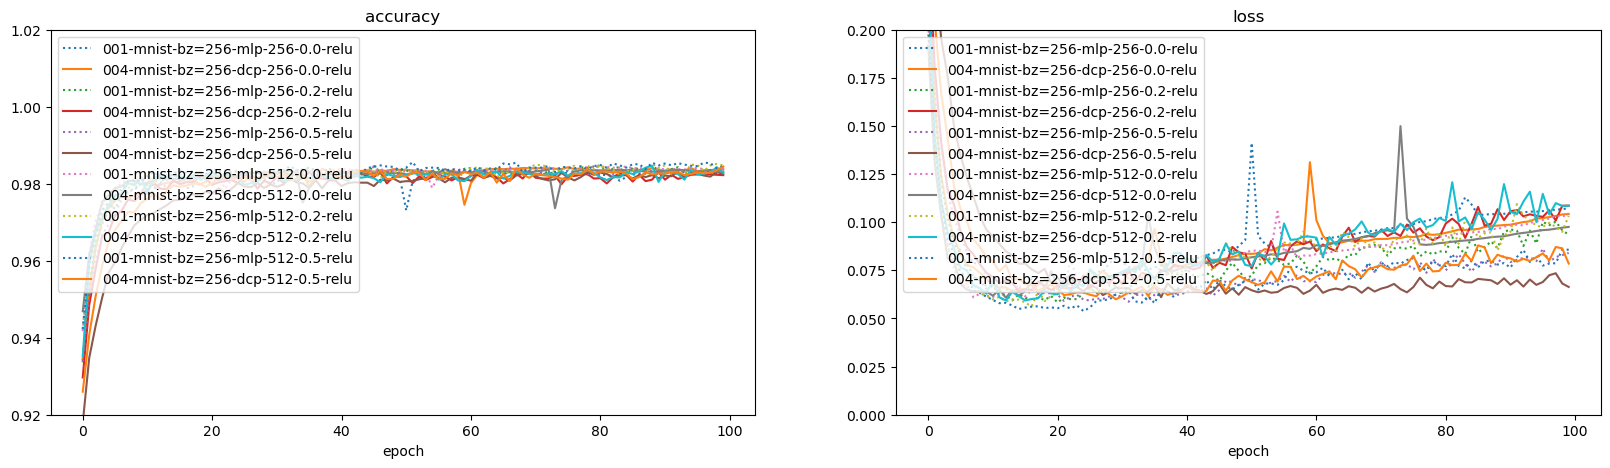

In [19]:
mnist_mlp = [
    "001-mnist-bz=256-mlp-256-0.0-relu",
    "001-mnist-bz=256-mlp-256-0.2-relu",
    "001-mnist-bz=256-mlp-256-0.5-relu",
    "001-mnist-bz=256-mlp-512-0.0-relu",
    "001-mnist-bz=256-mlp-512-0.2-relu",
    "001-mnist-bz=256-mlp-512-0.5-relu"
]

mnist_dcp = [
    "004-mnist-bz=256-dcp-256-0.0-relu",
    "004-mnist-bz=256-dcp-256-0.2-relu",
    "004-mnist-bz=256-dcp-256-0.5-relu",
    "004-mnist-bz=256-dcp-512-0.0-relu",
    "004-mnist-bz=256-dcp-512-0.2-relu",
    "004-mnist-bz=256-dcp-512-0.5-relu"
]

fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, dcp in zip(mnist_mlp, mnist_dcp):
    mlp_experiment = experiments.get_by_name(mlp)
    dcp_experiment = experiments.get_by_name(dcp)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    dcp_metrics = experiments.metrics.pull(dcp_experiment)
    dcp_state = experiments.states.get(dcp_experiment)
    
    ax[0].set_ylim((0.92, 1.02))
    ax[1].set_ylim((0, 0.2))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(dcp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=dcp)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(dcp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=dcp)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, dcp in zip(mnist_mlp, mnist_dcp):
    mlp_experiment = experiments.get_by_name(mlp)
    dcp_experiment = experiments.get_by_name(dcp)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    dcp_metrics = experiments.metrics.pull(dcp_experiment)
    dcp_state = experiments.states.get(dcp_experiment)
    
    ax[0].set_ylim((0.92, 1.02))
    ax[1].set_ylim((0, 0.2))
    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(dcp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=dcp)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(dcp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=dcp)
show()

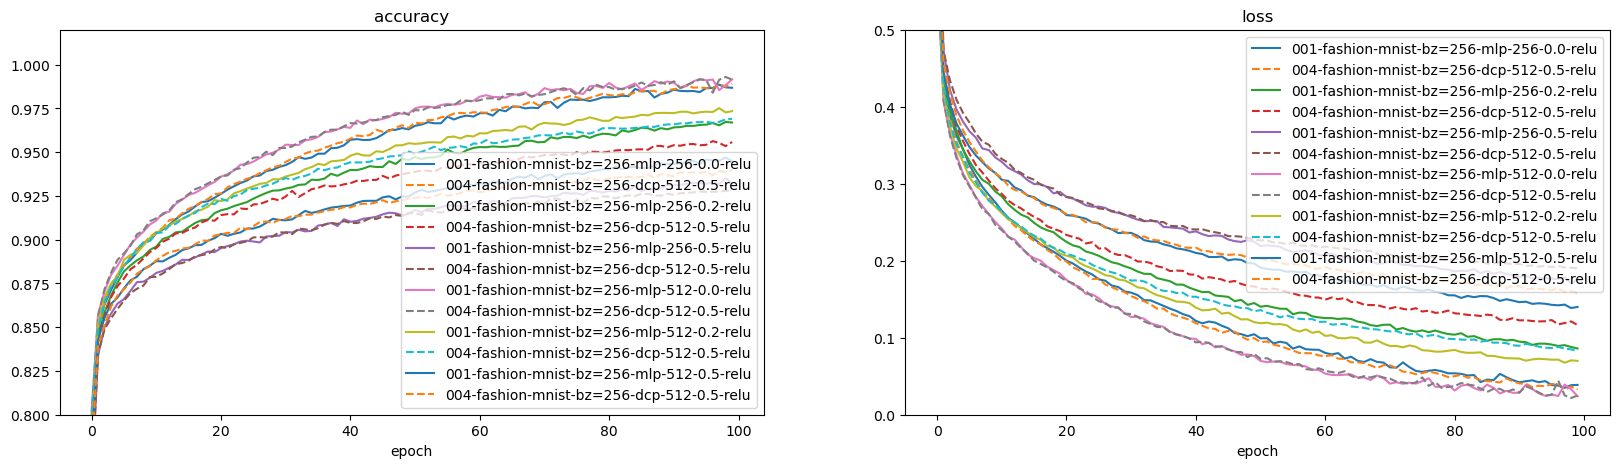

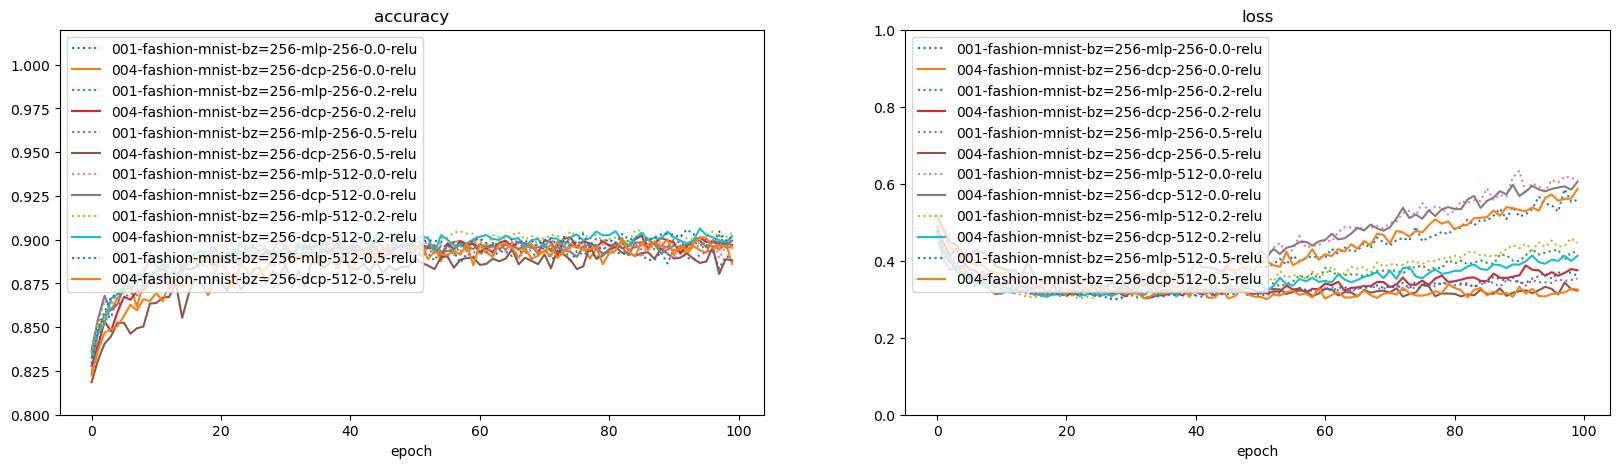

In [17]:
mnist_mlp = [
    "001-fashion-mnist-bz=256-mlp-256-0.0-relu",
    "001-fashion-mnist-bz=256-mlp-256-0.2-relu",
    "001-fashion-mnist-bz=256-mlp-256-0.5-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.0-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.2-relu",
    "001-fashion-mnist-bz=256-mlp-512-0.5-relu"
]

mnist_dcp = [
    "004-fashion-mnist-bz=256-dcp-256-0.0-relu",
    "004-fashion-mnist-bz=256-dcp-256-0.2-relu",
    "004-fashion-mnist-bz=256-dcp-256-0.5-relu",
    "004-fashion-mnist-bz=256-dcp-512-0.0-relu",
    "004-fashion-mnist-bz=256-dcp-512-0.2-relu",
    "004-fashion-mnist-bz=256-dcp-512-0.5-relu"
]

fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)

for mlp, dcp in zip(mnist_mlp, mnist_dcp):
    mlp_experiment = experiments.get_by_name(mlp)
    dcp_experiment = experiments.get_by_name(dcp)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    dcp_metrics = experiments.metrics.pull(dcp_experiment)
    dcp_state = experiments.states.get(dcp_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 0.5))


    plot(mlp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(dcp_metrics['accuracy'], ax[0], Phase.TRAIN , linestyle = '--', label=glu)
    plot(mlp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '-', label=mlp)
    plot(dcp_metrics['loss'], ax[1], Phase.TRAIN , linestyle = '--', label=glu)
show()


fig = figure(figsize=(20, 5))
ax: list[Axes] = fig.subplots(1, 2)
for mlp, dcp in zip(mnist_mlp, mnist_dcp):
    mlp_experiment = experiments.get_by_name(mlp)
    dcp_experiment = experiments.get_by_name(dcp)

    mlp_metrics = experiments.metrics.pull(mlp_experiment)
    mlp_state = experiments.states.get(mlp_experiment)

    dcp_metrics = experiments.metrics.pull(dcp_experiment)
    dcp_state = experiments.states.get(dcp_experiment)
    
    ax[0].set_ylim((0.8, 1.02))
    ax[1].set_ylim((0, 1))

    plot(mlp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(dcp_metrics['accuracy'], ax[0], Phase.EVALUATION , linestyle = '-', label=dcp)
    plot(mlp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = ':', label=mlp)
    plot(dcp_metrics['loss'], ax[1], Phase.EVALUATION , linestyle = '-', label=dcp)
show()